<a href="https://colab.research.google.com/github/PhimWi/Steam-mini-project/blob/main/Steam_Review_Wukong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#using Apify to scrape from this url
#https://store.steampowered.com/app/2358720/Black_Myth_Wukong/

In [3]:
import pandas as pd

wukong = pd.read_csv('/content/Wukong-Review.csv')

In [4]:
wukong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author/deck_playtime_at_review  121 non-null    float64
 1   author/last_played              9900 non-null   int64  
 2   author/num_games_owned          9900 non-null   int64  
 3   author/num_reviews              9900 non-null   int64  
 4   author/playtime_at_review       9900 non-null   int64  
 5   author/playtime_forever         9900 non-null   int64  
 6   author/playtime_last_two_weeks  9900 non-null   int64  
 7   author/steamid                  9900 non-null   int64  
 8   comment_count                   9900 non-null   int64  
 9   hidden_in_steam_china           9900 non-null   bool   
 10  language                        9900 non-null   object 
 11  primarily_steam_deck            9900 non-null   bool   
 12  received_for_free               99

In [5]:
wukong = wukong.drop(columns=['author/deck_playtime_at_review', 'steam_china_location'])

In [6]:
import re

def keep_english(text):
  # Check if the input is a string before applying re.sub
  if isinstance(text, str):
    text = re.sub(r'[^\x00-\x7F]+', '', text)
  # If not a string, return the original value
  return text

wukong['review'] = wukong['review'].apply(keep_english)

In [7]:
wukong = wukong[wukong['review'] != '']
wukong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5072 entries, 0 to 9899
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author/last_played              5072 non-null   int64  
 1   author/num_games_owned          5072 non-null   int64  
 2   author/num_reviews              5072 non-null   int64  
 3   author/playtime_at_review       5072 non-null   int64  
 4   author/playtime_forever         5072 non-null   int64  
 5   author/playtime_last_two_weeks  5072 non-null   int64  
 6   author/steamid                  5072 non-null   int64  
 7   comment_count                   5072 non-null   int64  
 8   hidden_in_steam_china           5072 non-null   bool   
 9   language                        5072 non-null   object 
 10  primarily_steam_deck            5072 non-null   bool   
 11  received_for_free               5072 non-null   bool   
 12  recommendationid                5072 no

In [8]:
wukong_eng = wukong[wukong['language'] == 'english']
wukong_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 4 to 9881
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author/last_played              976 non-null    int64  
 1   author/num_games_owned          976 non-null    int64  
 2   author/num_reviews              976 non-null    int64  
 3   author/playtime_at_review       976 non-null    int64  
 4   author/playtime_forever         976 non-null    int64  
 5   author/playtime_last_two_weeks  976 non-null    int64  
 6   author/steamid                  976 non-null    int64  
 7   comment_count                   976 non-null    int64  
 8   hidden_in_steam_china           976 non-null    bool   
 9   language                        976 non-null    object 
 10  primarily_steam_deck            976 non-null    bool   
 11  received_for_free               976 non-null    bool   
 12  recommendationid                976 non-

In [9]:
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    text = str(text)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

wukong_eng['sentiment'] = wukong_eng['review'].apply(get_sentiment)

<ipython-input-9-5745c64c9a49>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wukong_eng['sentiment'] = wukong_eng['review'].apply(get_sentiment)


In [10]:
wukong_eng.loc[:, ['review', 'sentiment']].reset_index(drop=True)

,review,sentiment
0,10/10\r\n,0.000000
1,"beware bald people, they will go after you wit...",-0.400000
2,"The story is just ok, but the rest of the game...",0.300000
3,I do not like difficult games. Because my purp...,-0.253333
4,Very good,0.910000
...,...,...
971,"Game play feels awesome, boss fights are not t...",0.550000
972,"Great atmosphere, great story, excellent chara...",0.428571
973,Chipi Chipi Chapa Chapa,0.000000
974,This game is fun and challenging.,0.133333


In [11]:
print(wukong_eng.loc[:, 'sentiment'].describe())

count    976.000000
mean       0.139252
std        0.307730
min       -0.976562
25%        0.000000
50%        0.084479
75%        0.285848
max        1.000000
Name: sentiment, dtype: float64


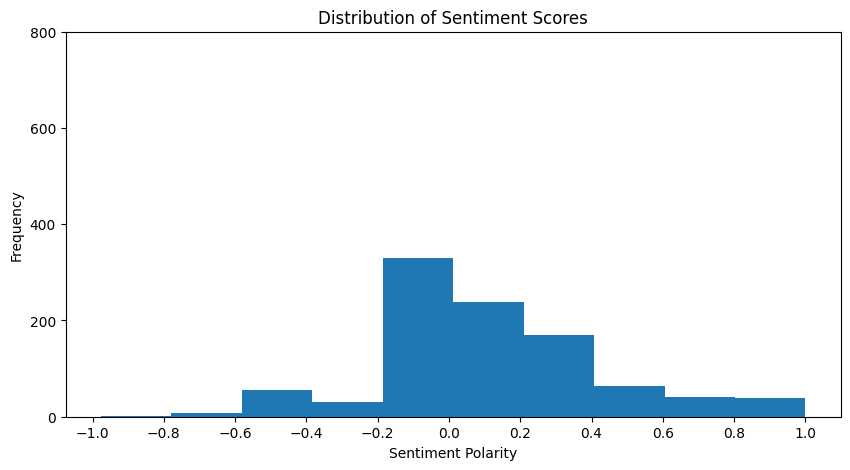

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.hist(wukong_eng['sentiment'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

plt.yticks(np.arange(0, 1000, step=200))
plt.xticks(np.arange(-1, 1.1, step=0.2))


plt.show()

In [13]:
negative_reviews = wukong_eng[wukong_eng['sentiment'] < 0]
negative_reviews.loc[:, ['review', 'sentiment']].sort_values(by = 'sentiment', ascending = False).reset_index(drop = True)

,review,sentiment
0,This game helped me reconnect with my childhoo...,-0.000909
1,Fun and interesting heard is kinda of like sou...,-0.005612
2,"The content, lore, and gameplay is worth every...",-0.007143
3,"It was too difficult. Other than that, it was ...",-0.008333
4,"Masterpiece, a must-play game, unique in its s...",-0.012500
...,...,...
194,Pingping is bad asf bro,-0.700000
195,collision box > hitbox which makes boss fights...,-0.700000
196,It's a fucking blast!\r\nIt's a fucking blast!...,-0.750000
197,game of the year!!!,-0.781250


In [14]:
positive_reviews = wukong_eng[wukong_eng['sentiment'] > 0]
positive_reviews.loc[:, ['review', 'sentiment']].sort_values(by = 'sentiment', ascending = False).reset_index(drop = True)

,review,sentiment
0,Totally Awesome !!!!!!!!!!!!!!!!!!!!!!!!!!!!!,1.000000
1,TOTALLY AWESOME,1.000000
2,One of my games of the year and one of the bes...,1.000000
3,What a Perfect Gameeeeee!!!,1.000000
4,exhilarating!!!!,1.000000
...,...,...
555,it might be hard but it is still so fun,0.004167
556,its hard but fun,0.004167
557,its fun and goes hard,0.004167
558,"very good game, the art style,bosses, and comb...",0.002500


In [15]:
def categorize_sentiment(sentiment):
    if sentiment < 0:
        return 'negative'
    elif sentiment > 0:
        return 'positive'
    else:
        return 'neutral'

wukong_eng['sentiment_category'] = wukong_eng['sentiment'].apply(categorize_sentiment)

<ipython-input-15-2a0d6b62d1bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wukong_eng['sentiment_category'] = wukong_eng['sentiment'].apply(categorize_sentiment)


In [16]:
wukong_eng.loc[:, ['review', 'sentiment', 'sentiment_category']].sort_values(by = 'sentiment', ascending = False).reset_index(drop = True)

,review,sentiment,sentiment_category
0,best of the year,1.000000,positive
1,Awesome,1.000000,positive
2,TOTALLY AWESOME,1.000000,positive
3,One of the best games of 2024. Son Goku never ...,1.000000,positive
4,One of the best games ive ever played 10/10,1.000000,positive
...,...,...,...
971,Pingping is bad asf bro,-0.700000,negative
972,collision box > hitbox which makes boss fights...,-0.700000,negative
973,It's a fucking blast!\r\nIt's a fucking blast!...,-0.750000,negative
974,game of the year!!!,-0.781250,negative


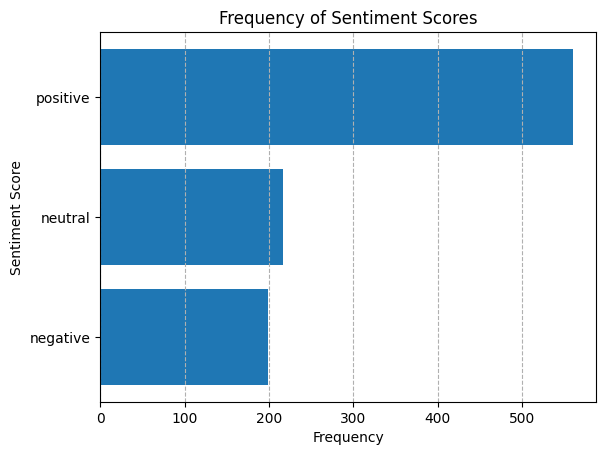

In [17]:
sentiment_counts = wukong_eng['sentiment_category'].value_counts().sort_index()

plt.barh(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')
plt.title('Frequency of Sentiment Scores')
plt.grid(axis='x', linestyle='--')
plt.show()

In [29]:
wukong_eng.to_csv('wukong_eng.csv', index=False)

# SHAP Positive vs. Negative Sentiment Classification
 credit : https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html#Load-the-IMDB-movie-review-dataset

install datasets library to load our dataset of Black Myth: Wukong reviews

In [19]:
!pip install datasets
from datasets import load_dataset

In [22]:
!pip install shap
!pip install transformers
import transformers
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


In [30]:
dataset = load_dataset("csv", data_files="/content/wukong_eng.csv", split="train")
short_data = [v[:500] for v in dataset["review"][:20]]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [31]:
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'NEGATIVE', 'score': 0.0669366717338562},
  {'label': 'POSITIVE', 'score': 0.9330633282661438}],
 [{'label': 'NEGATIVE', 'score': 0.7015141844749451},
  {'label': 'POSITIVE', 'score': 0.29848578572273254}]]

In [32]:
# define the explainer
explainer = shap.Explainer(classifier)

In [70]:
# explain the predictions of the pipeline on one samples
shap_values = explainer(short_data[3:4])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:04, 64.39s/it]               


In [71]:
shap.plots.text(shap_values[:, :, "POSITIVE"])

Wrap the pipeline manually

In [72]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=False)
pmodel(short_data[3:4])

array([[3.92434071e-04, 9.99607623e-01]])

In [73]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=True)
pmodel(short_data[3:4])

array([[-7.8427495 ,  7.84289403]])

In [74]:
explainer2 = shap.Explainer(pmodel)
shap_values2 = explainer2(short_data[3:4])
shap.plots.text(shap_values2[:, :, 1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:15, 75.99s/it]               


Pass a tokenizer as the masker object


In [75]:
explainer2 = shap.Explainer(pmodel, classifier.tokenizer)
shap_values2 = explainer2(short_data[3:4])
shap.plots.text(shap_values2[:, :, 1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:10, 70.33s/it]               


In [76]:
masker = shap.maskers.Text(classifier.tokenizer)
explainer2 = shap.Explainer(pmodel, masker)
shap_values2 = explainer2(short_data[3:4])
shap.plots.text(shap_values2[:, :, 1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [01:07, 67.90s/it]               


In [77]:
shap_values = explainer(short_data[:20])


  0%|          | 0/380 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 2/20 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 4/20 [03:16<21:11, 79.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  35%|███▌      | 7/20 [04:24<06:37, 30.57s/it]

  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 8/20 [04:44<05:25, 27.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  45%|████▌     | 9/20 [05:36<06:26, 35.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 10/20 [06:20<06:18, 37.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  55%|█████▌    | 11/20 [09:33<12:53, 85.99s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer:  75%|███████▌  | 15/20 [09:49<01:54, 22.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  85%|████████▌ | 17/20 [10:50<01:12, 24.03s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 20/20 [11:34<00:00, 14.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 21it [12:22, 39.08s/it]


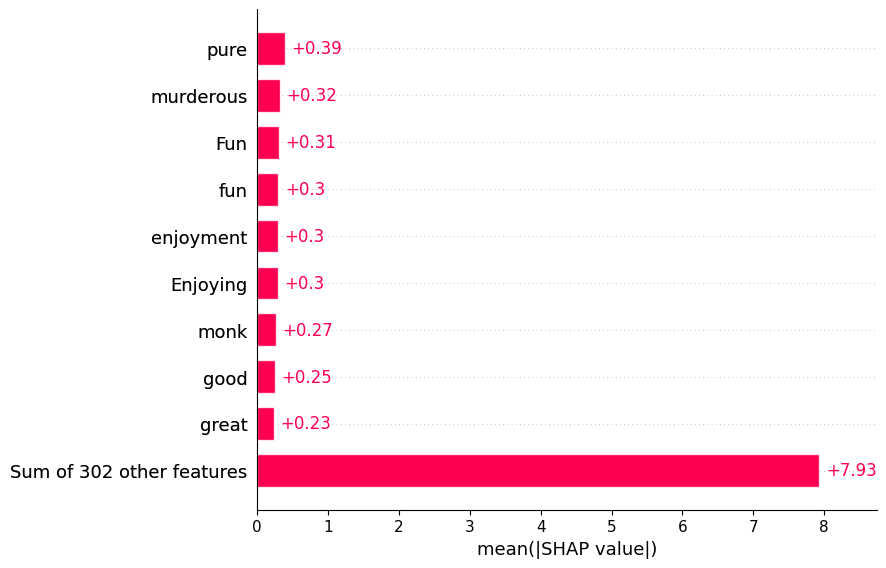

In [88]:
shap.plots.bar(shap_values[:, :, "POSITIVE"])

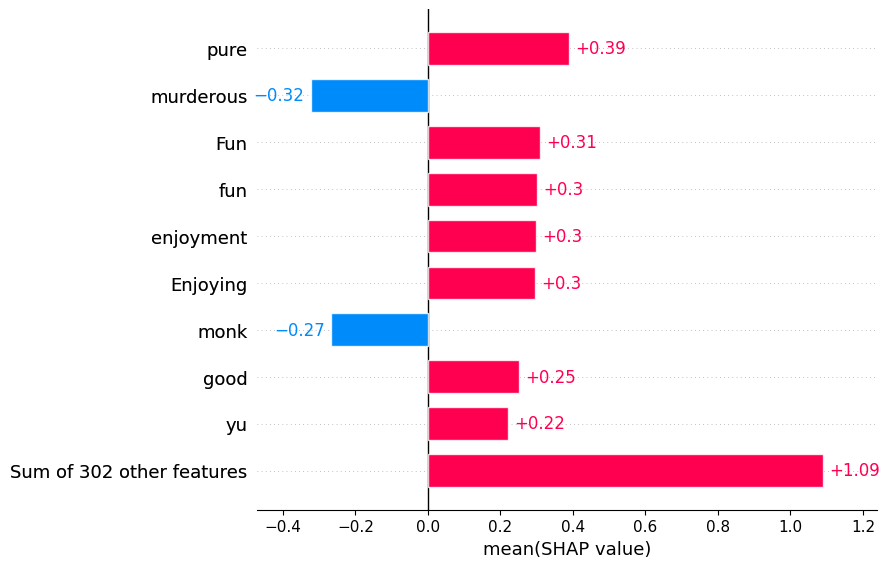

In [90]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

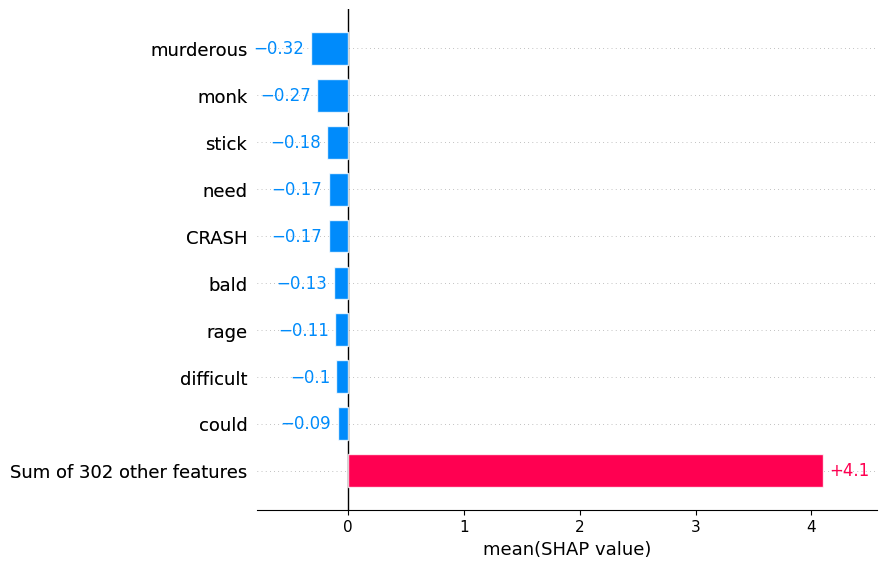

In [91]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0), order=shap.Explanation.argsort)